## 2量子ビット

qiskitを利用して、量子アルゴリズムについて自分なりに勉強していこうと思います。
個人的な勉強の記録なので、説明などを大幅に省いている可能性があります。

qiskitのウェブサイト通りに勉強を進めています。

- https://qiskit.org/textbook/ja/preface.html 

前回は基本的な使い方と1量子ビットのゲート演算が中心でしたが、今回は2量子ビットの演算を理解します。


### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/rec/qiskit/base2/base_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/rec/qiskit/base2/base_nb.ipynb)

### 筆者の環境

In [8]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G103


In [9]:
!python -V

Python 3.8.5


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)
print('pandas version :', pd.__version__)

matplotlib version : 3.3.2
scipy version : 1.5.2
numpy version : 1.19.2
pandas version : 1.1.3


In [135]:
import qiskit
import json

dict(qiskit.__qiskit_version__)

{'qiskit-terra': '0.17.4',
 'qiskit-aer': '0.8.2',
 'qiskit-ignis': '0.6.0',
 'qiskit-ibmq-provider': '0.13.1',
 'qiskit-aqua': '0.9.1',
 'qiskit': '0.26.2',
 'qiskit-nature': None,
 'qiskit-finance': None,
 'qiskit-optimization': None,
 'qiskit-machine-learning': None}

$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $

$$
|+++\rangle=\frac{1}{\sqrt{8}}\left[\begin{array}{l}
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1
\end{array}\right]
$$

$$
|b a\rangle=|b\rangle \otimes|a\rangle=\left[\begin{array}{l}
b_{0} \times\left[\begin{array}{l}
a_{0} \\
a_{1}
\end{array}\right] \\
b_{1} \times\left[\begin{array}{l}
a_{0} \\
a_{1}
\end{array}\right]
\end{array}\right]=\left[\begin{array}{l}
b_{0} a_{0} \\
b_{0} a_{1} \\
b_{1} a_{0} \\
b_{1} a_{1}
\end{array}\right]
$$

In [29]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [30]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [31]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [32]:
for j in range(n):
    qc_output.measure(j,j)

In [33]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

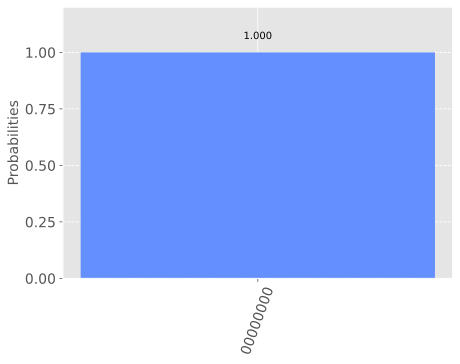

In [34]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [35]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

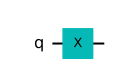

In [36]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

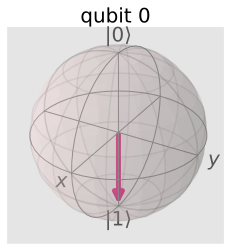

In [37]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

# 結果を見てみましょう
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

$|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}$

In [38]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

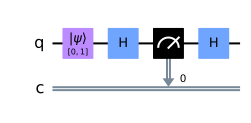

In [93]:
from qiskit.extensions import Initialize # Inititialize機能をインポートします。
# X測定関数を作成します。
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# 量子ビットを初期化して測定します。
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initialize_qubit = Initialize(initial_state)
qc.append(initialize_qubit, [0])
x_measurement(qc, 0, 0)
qc.draw('mpl')

$$
\|\mathbf{x}\|_{p}=\left(\sum_{i=1}^{n}\left|x_{i}\right|^{p}\right)^{\frac{1}{p}}
$$

$ X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix} $

In [40]:
from qiskit_textbook.tools import array_to_latex

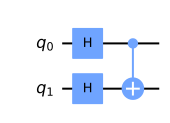

<IPython.core.display.Math object>

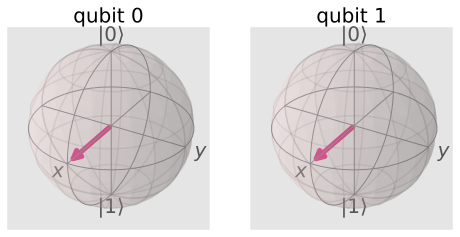

In [256]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw('mpl'))

# Let's see the result
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

In [50]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

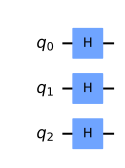

In [94]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

In [52]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

In [53]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [54]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')  # Jupyterノートブックの場合

In [55]:
# |0> 量子ビットに対してゲート作用させてみましょう。
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

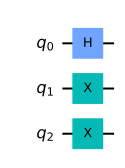

In [67]:
qc = QuantumCircuit(3)
qc.h(0)
qc.x(1)
qc.x(2)
qc.draw('mpl')

In [63]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

In [64]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

$$
X \otimes H=\left[\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right] \otimes \frac{1}{\sqrt{2}}\left[\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}
0 \times\left[\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right] & 1 \times\left[\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right] \\
1 \times\left[\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right] & 0 \times\left[\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right]
\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{cccc}
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1 \\
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0
\end{array}\right]
$$